<a href="https://colab.research.google.com/github/derewor/Anchor_Media_Project/blob/main/Anchor_media_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anchor Media Youtube Channel**


In [1]:
# import all the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
!pip install pandas openpyxl

In [2]:
# import the downloaded data from the youtube data API.
df = pd.read_csv('/content/Anchor.csv', on_bad_lines='skip')
df.head(2)

,title,videoId,viewCount,likeCount,dislikeCount,commentCount,favoriteCount,duration,uploadTime;;;;;;;;
0,Anchor Media 'ashaaraa yamiqamathawe taarikene...,0V_K8bhbvmc,39620.0,2161.0,0.0,178.0,0,PT19M21S,2024-10-15 03:15:45;;;;;;;;
1,Anchor Media 'adise 'ababaa yahezebe quthaa li...,m0fDdANb2Xo,62090.0,3137.0,0.0,304.0,0,PT1H20M29S,2024-10-15 01:20:00;;;;;;;;


# **1. Data Cleaning**

In [3]:
# The dataframe contains data which are not from Anchor Media. The videos from Anchor media starts with Anchor.
# So, the data frame is cleaned for that. This reduced the data size from 500 to 343.
df2 = df[df['title'].str.startswith('Anchor', na=False)]
df2.shape

(343, 9)

In [4]:
# Check if there are mising values or duplicates.
df2.drop_duplicates()
print(df2.isna().sum())

title                 0
videoId               1
viewCount             1
likeCount             1
dislikeCount          1
commentCount          1
favoriteCount         1
duration              1
uploadTime;;;;;;;;    1
dtype: int64


In [5]:
# There is one null value in all columns except the title. So, drop the null.
df2= df2.dropna()
df2.isna().sum()

,0
title,0
videoId,0
viewCount,0
likeCount,0
dislikeCount,0
commentCount,0
favoriteCount,0
duration,0
uploadTime;;;;;;;;,0


In [6]:
# Change the dtypes of columns that need to be intiger
df2[['viewCount','likeCount','dislikeCount','commentCount', 'favoriteCount']] = df2[['viewCount','likeCount','dislikeCount','commentCount', 'favoriteCount']].astype(int)
df2.dtypes

,0
title,object
videoId,object
viewCount,int64
likeCount,int64
dislikeCount,int64
commentCount,int64
favoriteCount,int64
duration,object
uploadTime;;;;;;;;,object


In [7]:
# Check the datatype of each columns. The floates need to be intiger, and the upload time need to be datetime
# format and the column name upload time needs correction.
print(df2.dtypes)

title                 object
videoId               object
viewCount              int64
likeCount              int64
dislikeCount           int64
commentCount           int64
favoriteCount          int64
duration              object
uploadTime;;;;;;;;    object
dtype: object


In [8]:
# Correct the columns names for all fields including the upload time.
df2.columns = ['title','video_id','view_count','like_count','dislike_count','comment_count','favorite_count','duration','upload_Time']
# The semicolons also need to be removed from all rows in the upload_time column and the dtype need to be converted to datetime.
df2['upload_Time'] = df2['upload_Time'].str.replace(';','')
df2['upload_Time'] = pd.to_datetime(df2['upload_Time'])
df2.head(2)

,title,video_id,view_count,like_count,dislike_count,comment_count,favorite_count,duration,upload_Time
0,Anchor Media 'ashaaraa yamiqamathawe taarikene...,0V_K8bhbvmc,39620,2161,0,178,0,PT19M21S,2024-10-15 03:15:45
1,Anchor Media 'adise 'ababaa yahezebe quthaa li...,m0fDdANb2Xo,62090,3137,0,304,0,PT1H20M29S,2024-10-15 01:20:00


In [9]:
# The duration of the video is expressed in the ISO8601 duration format. So, this needs to be converted to min or
# hour before changing the datatype. Here into min.
def iso8601_to_minutes(duration):
    # Regular expression to match ISO 8601 duration format
    pattern = re.compile(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?')

    # Match the duration string
    match = pattern.match(duration)

    if not match:
        return 0  # Return 0 if the format is incorrect

    # Extract hours, minutes, and seconds, defaulting to 0 if not present
    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    seconds = int(match.group(3)) if match.group(3) else 0

    # Convert total duration to minutes
    total_minutes = hours * 60 + minutes + seconds / 60

    return total_minutes
df2.loc[:,'duration_min'] = df2['duration'].apply(iso8601_to_minutes).round(2)
df2 = df2.drop(columns='duration')

In [10]:
# Check of all columns are in the right dtype.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 536
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           342 non-null    object        
 1   video_id        342 non-null    object        
 2   view_count      342 non-null    int64         
 3   like_count      342 non-null    int64         
 4   dislike_count   342 non-null    int64         
 5   comment_count   342 non-null    int64         
 6   favorite_count  342 non-null    int64         
 7   upload_Time     342 non-null    datetime64[ns]
 8   duration_min    342 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 26.7+ KB


The dataframe df2 was download and inspected all rows for integrity in excel.

# **2. Data Wrangling**

In [11]:
# Inspection of all rows in excel identified few rows which starts with Anchor but still not belong to this channel.
# These rows were removed and the data was uploaded. Read the top three rows
df3 = pd.read_excel('/content/Anchor_media.xlsx', header=0, index_col='index')
df3.head(3)

,title,title.1,view_count,like_count,dislike_count,comment_count,favorite_count,upload_Time,duration_min
index,,,,,,,,,
0,Anchor Media 'ashaaraa yamiqamathawe taarikene...,0V_K8bhbvmc,39620,2161,0,178,0,2024-10-15 03:15:45,19.35
1,Anchor Media 'adise 'ababaa yahezebe quthaa li...,m0fDdANb2Xo,62090,3137,0,304,0,2024-10-15 01:20:00,80.48
2,Anchor yamerekonyaa gorefe &#39;&#39;wanedemo...,aUgmAdA1Gzc,174784,8018,0,733,0,2024-10-14 01:30:49,22.03


In [12]:
# determine the length of the video title
df3['title_length'] = df3['title'].str.len()
df3.head(2)

,title,title.1,view_count,like_count,dislike_count,comment_count,favorite_count,upload_Time,duration_min,title_length
index,,,,,,,,,,
0,Anchor Media 'ashaaraa yamiqamathawe taarikene...,0V_K8bhbvmc,39620,2161,0,178,0,2024-10-15 03:15:45,19.35,96
1,Anchor Media 'adise 'ababaa yahezebe quthaa li...,m0fDdANb2Xo,62090,3137,0,304,0,2024-10-15 01:20:00,80.48,172


In [13]:
# which durations the data covers? The data covers a time duration of 17 months.
data_min = df3['upload_Time'].min()
data_max = df3['upload_Time'].max()
print(data_min)
print(data_max)

2023-05-15 01:34:32
2024-10-15 03:15:45


In [18]:
# To reduce the effect of time, a data cohort is selected from the year 2024.
df3['upload_Time'] = pd.to_datetime(df3['upload_Time'])
df3['month'] = df3['upload_Time'].dt.month
df3['year'] = df3['upload_Time'].dt.year
df_2024 = df3[(df3['year']==2024) & (df3['month']<= 6)]
print(df_2024.shape)

(165, 12)


In [19]:
# there is a big difference in the mean and median values of the view_count suggesting an outlier.
df_2024.describe()

,view_count,like_count,dislike_count,comment_count,favorite_count,upload_Time,duration_min,title_length,month,year
count,1.650000e+02,165.000000,165.0,165.000000,165.0,165,165.000000,165.000000,165.000000,165.0
mean,1.171442e+05,5687.806061,0.0,337.830303,0.0,2024-04-16 04:47:53.648484864,52.805152,134.345455,4.000000,2024.0
min,7.226000e+03,538.000000,0.0,20.000000,0.0,2024-01-02 07:46:29,0.370000,29.000000,1.000000,2024.0
25%,6.247300e+04,2494.000000,0.0,196.000000,0.0,2024-03-14 05:48:58,17.830000,83.000000,3.000000,2024.0
50%,7.861000e+04,3302.000000,0.0,285.000000,0.0,2024-04-29 17:12:17,57.600000,155.000000,4.000000,2024.0
75%,1.157240e+05,4602.000000,0.0,415.000000,0.0,2024-05-26 03:58:42,80.700000,179.000000,5.000000,2024.0
max,4.606091e+06,343468.000000,0.0,1427.000000,0.0,2024-06-29 07:34:28,136.020000,204.000000,6.000000,2024.0
std,3.543250e+05,26507.744928,0.0,239.634799,0.0,NaN,33.225198,52.379671,1.637964,0.0


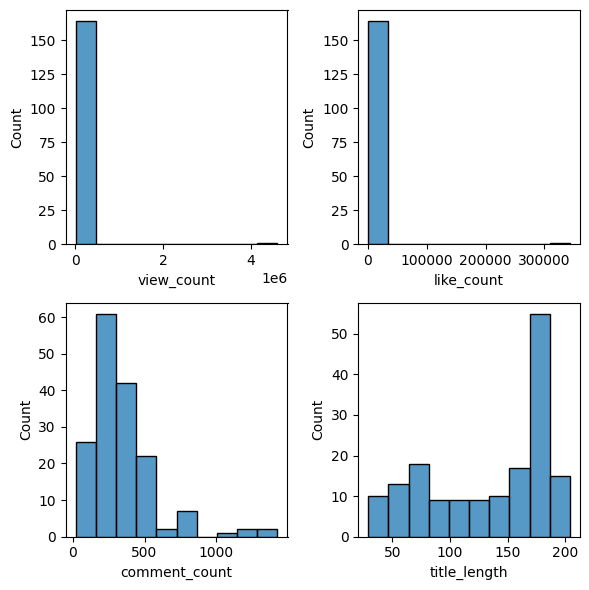

In [20]:
# observe the distribution of the features. The figure shows tat there is an outlier in the view_count and like_counts.
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
sns.histplot(df_2024['view_count'], bins=10, ax=axes[0,0])
sns.histplot(df_2024['like_count'], bins=10, ax=axes[0,1])
sns.histplot(df_2024['comment_count'], bins=10, ax=axes[1,0])
sns.histplot(df_2024['title_length'], bins=10, ax=axes[1,1])

plt.tight_layout()
plt.show()

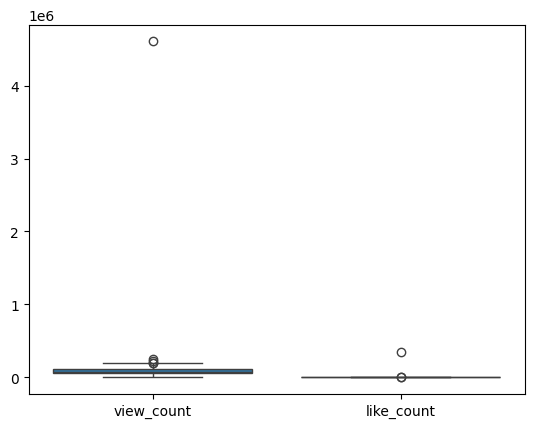

In [21]:
# check the number of outliers in boxplot. There is one data in view_point which has extremly higher number of viewers.
figsize=(6, 12)
sns.boxplot(data=df_2024[['view_count','like_count']])
plt.show()

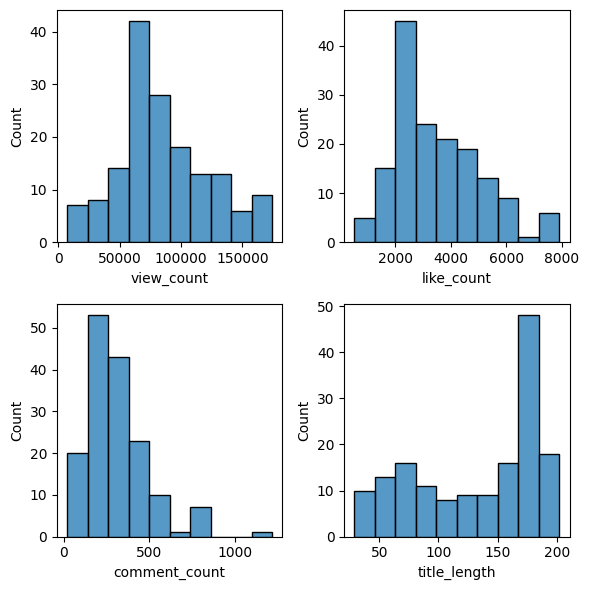

In [22]:
# exclude the outliers from the data and replot the distribution. The distribution is much improved now.
df4 = df_2024[df_2024['view_count']<180000]
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
sns.histplot(df4['view_count'], bins=10, ax=axes[0,0])
sns.histplot(df4['like_count'], bins=10, ax=axes[0,1])
sns.histplot(df4['comment_count'], bins=10, ax=axes[1,0])
sns.histplot(df4['title_length'], bins=10, ax=axes[1,1])

plt.tight_layout()
plt.show()

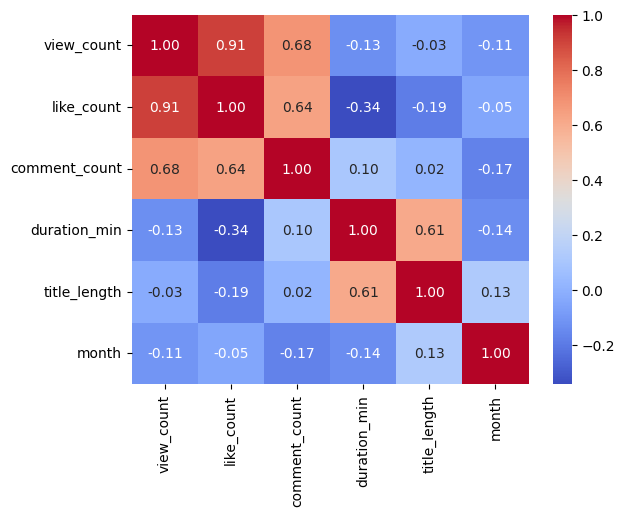

In [23]:
# what is the correlation between the features.
selected_df = df4.drop(columns=(['title','title.1','dislike_count','favorite_count','upload_Time','year']))
corr_matrix = selected_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.show()

# **Questions**

### **1. Does shorter videos receive more visibility (view counts, like and comment) than the longer videos? Show graphically**


In [25]:
# Create a new feature that bins the videos based on durations
bins = [0,20,40,60,80,100,120,140]
labels = ['0-20','20-40','40-60','60-80','80-100','100-120','120-140']
df4.loc[:,'dur_categ'] = pd.cut(df4['duration_min'],bins=bins, labels=labels, right=False)
df4.head(2)

,title,title.1,view_count,like_count,dislike_count,comment_count,favorite_count,upload_Time,duration_min,title_length,month,year,dur_categ
index,,,,,,,,,,,,,
5,Anchor Breaking sabare zeenaa,pdGZZ54rmBM,116364,3217,0,258,0,2024-02-05 13:27:30,0.37,29,2,2024,0-20
25,Anchor Special ya'abeye 'ahemade yathelaacaa n...,TGII2yhyQm0,138099,5609,0,566,0,2024-05-12 03:50:29,18.78,55,5,2024,0-20


In [26]:
# What is the average view, like and comment per duration category?
ave_stat = df4.groupby('dur_categ',observed=True).agg(avg_view = ('view_count', 'mean'),
                                                      avg_like = ('like_count','mean'),
                                                      avg_comment =('comment_count', 'mean'),
                                                      num_video = ('title', 'count')).round(2)
ave_stat['total_view'] = ave_stat['avg_view'] * ave_stat['num_video']
# Some of the video categories contain only one video. So, for the analysis min video number of 5 was set.
ave_stat5 = ave_stat.query("num_video > 5").reset_index()
ave_stat5.columns = ['duration_cat','avg_view','avg_like','avg_comment','num_video','total_view']
ave_stat5

,duration_cat,avg_view,avg_like,avg_comment,num_video,total_view
0,0-20,89150.96,4198.70,302.17,46,4100944.16
1,20-40,102169.47,4125.59,289.76,17,1736880.99
2,40-60,86276.83,3402.83,332.83,18,1552982.94
3,60-80,80156.91,3101.03,312.83,35,2805491.85
4,80-100,68700.78,2642.33,258.75,36,2473228.08


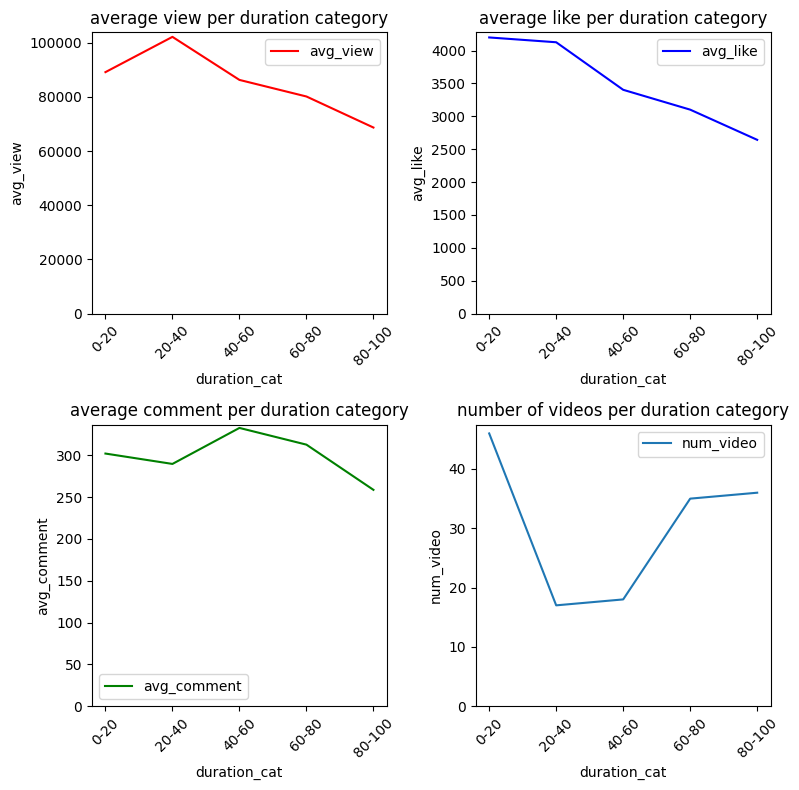

In [76]:
fig, axes = plt.subplots(2,2, figsize=(8,8))
sns.lineplot(data=ave_stat5, x='duration_cat', y='avg_view',ax=axes[0,0], label='avg_view', color='r')
axes[0,0].set_title('average view per duration category')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].set_ylim(0, )
sns.lineplot(data=ave_stat5, x='duration_cat', y='avg_like', ax=axes[0,1], label='avg_like', color='b')
axes[0,1].set_title('average like per duration category')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_ylim(0, )
sns.lineplot(data=ave_stat5, x='duration_cat', y='avg_comment', ax=axes[1,0], label='avg_comment', color='g')
axes[1,0].set_title('average comment per duration category')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].set_ylim(0, )
sns.lineplot(data=ave_stat5, x='duration_cat', y='num_video', ax=axes[1,1],label='num_video')
axes[1,1].set_title('number of videos per duration category')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].set_ylim(0, )
plt.tight_layout()
plt.show()

# **Result Summary:**
**Generally shorter videos appear to receive more viewers than longer videos. The video duration of 20-40 min received the highest average number of viewers. For example, the video duration of 20-40 min received on average 35000 more viewers than when the the video duration is 80-100 min. The number of likes also reduce linearly with increasing the duration of the video. However, the number of videos of this duration is by half less than the number of videos of more than one hour length**

### **2. Does the timing of the broadacast affect the number of viewers?**

In [31]:
# First, extract the hour from the upload_time feature.
df4.loc[:,'hour'] = df4['upload_Time'].dt.hour
df4.head(2)

,title,title.1,view_count,like_count,dislike_count,comment_count,favorite_count,upload_Time,duration_min,title_length,month,year,dur_categ,hour
index,,,,,,,,,,,,,,
5,Anchor Breaking sabare zeenaa,pdGZZ54rmBM,116364,3217,0,258,0,2024-02-05 13:27:30,0.37,29,2,2024,0-20,13
25,Anchor Special ya'abeye 'ahemade yathelaacaa n...,TGII2yhyQm0,138099,5609,0,566,0,2024-05-12 03:50:29,18.78,55,5,2024,0-20,3


In [36]:
# First, the 24 hours of the day is grouped into time blocks of 3 hours i.e. a total of 8 blocks. This time blocking
# also masks the effect of minute difference in the video-uploading time.
df4.loc[:,'time_block'] = pd.cut(df4['hour'], bins=range(0, 25, 3), right=False,
                           labels=['0-3', '3-6', '6-9', '9-12',
                                   '12-15', '15-18','18-21', '21-0'])
df4.head(2)

<ipython-input-36-8b8c7f9b27e2>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['12-15', '3-6', '6-9', '21-0', '15-18', ..., '15-18', '0-3', '21-0', '0-3', '0-3']
Length: 158
Categories (8, object): ['0-3' < '3-6' < '6-9' < '9-12' < '12-15' < '15-18' < '18-21' < '21-0']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df4.loc[:,'time_block'] = pd.cut(df4['hour'], bins=range(0, 25, 3), right=False,


,title,title.1,view_count,like_count,dislike_count,comment_count,favorite_count,upload_Time,duration_min,title_length,month,year,dur_categ,hour,time_block
index,,,,,,,,,,,,,,,
5,Anchor Breaking sabare zeenaa,pdGZZ54rmBM,116364,3217,0,258,0,2024-02-05 13:27:30,0.37,29,2,2024,0-20,13,12-15
25,Anchor Special ya'abeye 'ahemade yathelaacaa n...,TGII2yhyQm0,138099,5609,0,566,0,2024-05-12 03:50:29,18.78,55,5,2024,0-20,3,3-6


In [37]:
# Determine the number of viewers, likes, comments and videos published in these time blocks.
view_times = df4.groupby('time_block',observed=True).agg(avr_view = ('view_count', 'mean'),
                                                      avr_like = ('like_count','mean'),
                                                      avr_comment =('comment_count', 'mean'),
                                                      numr_video = ('title', 'count')).round(2).reset_index()
view_times

,time_block,avr_view,avr_like,avr_comment,numr_video
0,0-3,81457.95,3206.05,260.45,22
1,3-6,90349.15,3706.47,310.56,34
2,6-9,109512.73,4649.27,397.27,11
3,9-12,74277.71,3493.14,217.86,7
4,12-15,92868.20,3511.30,263.60,10
5,15-18,87140.50,3736.81,305.31,16
6,18-21,77410.83,3232.17,352.79,29
7,21-0,79141.31,3186.69,314.52,29


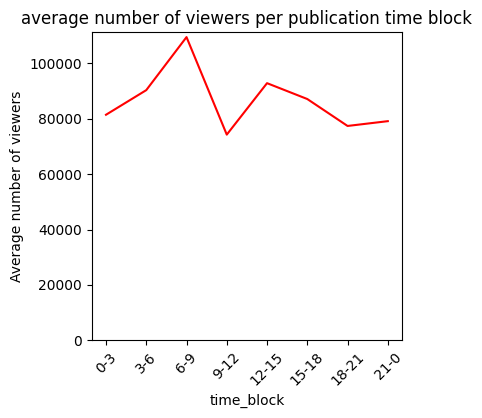

In [44]:
# visualize the data in lineplot
plt.figure(figsize=(4,4))
sns.lineplot(data=view_times, x='time_block', y='avr_view', color='r')
plt.title('average number of viewers per publication time block')
plt.xticks(rotation=45)
plt.ylabel('Average number of viewers')
plt.ylim(0,)
plt.show()

# **Result Summary**
**Videos that are published between 6 and 9 AM in the morning received more viewers than published any other time during the day. This morning hours in europe are likely late evenning in USA. By publishing the videos in this time block, the number of viewers can be increased by at least 15000 more. The average number of likes and comments are also higher on videos puvlished in this time block.**

### **3. Does shorter video titles receive more visbility than long titles?**


In [46]:
# The length of the title is a continous data. So, I created a category of title length based on ranges.
# determine the range of the length of the title. The shortest title has 20 chracters where as the longest has 202
# charrcters.
length_ranges = df4['title_length'].agg(['max','min'])
length_ranges

,title_length
max,202
min,29


In [49]:
# Now, split the title length into three categories as short, medium and long titles.
# less than 75 is short, between 75 and 150 is medium and greater than 150 is long.
bins =[0, 75, 150, 225]
df4.loc[:,'title_categ'] = pd.cut(df4['title_length'], bins=bins,
                            labels=('short', 'medium', 'long'), right=False)
df4.head(2)

,title,title.1,view_count,like_count,dislike_count,comment_count,favorite_count,upload_Time,duration_min,title_length,month,year,dur_categ,hour,time_block,title_categ
index,,,,,,,,,,,,,,,,
5,Anchor Breaking sabare zeenaa,pdGZZ54rmBM,116364,3217,0,258,0,2024-02-05 13:27:30,0.37,29,2,2024,0-20,13,12-15,short
25,Anchor Special ya'abeye 'ahemade yathelaacaa n...,TGII2yhyQm0,138099,5609,0,566,0,2024-05-12 03:50:29,18.78,55,5,2024,0-20,3,3-6,short


In [53]:
# what is the average duration of the video based on title length?
duratio_title = df4.groupby('title_categ').agg(avg_duration= ('duration_min', 'mean'),
                                               numb_video = ('title', 'count')).round(2).reset_index()
duratio_title

<ipython-input-53-5ba37d1d23bb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duratio_title = df4.groupby('title_categ').agg(avg_duration= ('duration_min', 'mean'),


,title_categ,avg_duration,numb_video
0,short,24.77,33
1,medium,39.30,40
2,long,69.80,85


**The average duration of the video linearly increases with the title. Similarly, the highest number of videos published have long title and longer duration.**

In [54]:
# What is the average number of viewers, likers, commentors for different sizes of the title length?
view_titlen = df4.groupby('title_categ',observed=True).agg(avg_views = ('view_count', 'mean'),
                                                      avg_likes = ('like_count','mean'),
                                                      avg_comments =('comment_count', 'mean')
                                                      ).round(2).reset_index()
view_titlen

,title_categ,avg_views,avg_likes,avg_comments
0,short,93351.73,4143.27,313.88
1,medium,79374.82,3477.22,321.27
2,long,84657.32,3263.28,304.09


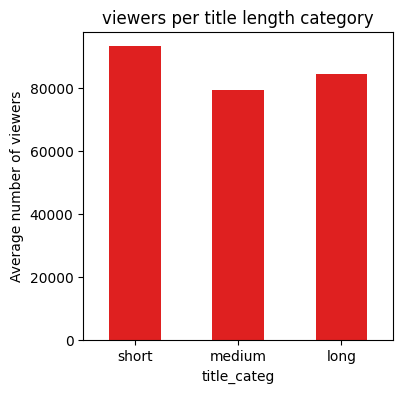

In [59]:
# show the average viwers with bargraph
plt.figure(figsize=(4,4))
sns.barplot(data=view_titlen, x='title_categ', y='avg_views', color='r', width=0.5)
plt.ylabel('Average number of viewers')
plt.title('viewers per title length category')
plt.show()

# **Result Summary**
**Generally, the number of viewers slightly affected by the length of the title. The shorter the title of the video, the slightly more viewers it receives.**

### **4. What proportion of the viewers like, dislike or comment the video?**

In [63]:
# what is the rate of likes and comments per view?
df4.loc[:,'like_rate'] = df4['like_count'] / df4['view_count']
df4.loc[:,'comment_rate'] = df4['comment_count'] / df4['view_count']
df4.head(2)

,title,title.1,view_count,like_count,dislike_count,comment_count,favorite_count,upload_Time,duration_min,title_length,month,year,dur_categ,hour,time_block,title_categ,like_rate,comment_rate
index,,,,,,,,,,,,,,,,,,
5,Anchor Breaking sabare zeenaa,pdGZZ54rmBM,116364,3217,0,258,0,2024-02-05 13:27:30,0.37,29,2,2024,0-20,13,12-15,short,0.027646,0.002217
25,Anchor Special ya'abeye 'ahemade yathelaacaa n...,TGII2yhyQm0,138099,5609,0,566,0,2024-05-12 03:50:29,18.78,55,5,2024,0-20,3,3-6,short,0.040616,0.004099


In [69]:
# what is the maximum and minimum like and comment rates per video?
min_max_stats = df4[['like_rate','comment_rate']].agg(['min','max'])
min_max_stats

,like_rate,comment_rate
min,0.027646,0.000973
max,0.074453,0.011367


In [74]:
# what is the like_rate and comment_rate vary per duration category?
avg_stats = df4.groupby('dur_categ', observed=True)[['like_rate','comment_rate']].mean().reset_index()
avg_stats

,dur_categ,like_rate,comment_rate
0,0-20,0.048645,0.003455
1,20-40,0.044610,0.002785
2,40-60,0.039523,0.003812
3,60-80,0.039094,0.004044
4,80-100,0.040003,0.003727
5,100-120,0.032598,0.004646
6,120-140,0.034695,0.007160


In [75]:
# how the average like-rate and comment_rate vary by time_block?
avg_stat = df4.groupby('time_block', observed=True)[['like_rate','comment_rate']].mean().reset_index()
avg_stat

,time_block,like_rate,comment_rate
0,0-3,0.040525,0.003148
1,3-6,0.042085,0.003408
2,6-9,0.042926,0.003756
3,9-12,0.046518,0.002988
4,12-15,0.041125,0.002886
5,15-18,0.044241,0.003641
6,18-21,0.042722,0.004469
7,21-0,0.042593,0.004032


# **Result Summary**
**Generally, the like_ and comment_rate are very low compared to the size of viewers. The maximum like rate is ~7% whereas the minimum is ~3%. The rate is not greatly altered by the duration of the video or the timing of its broadcast.**

## **5. Conclusion and Recommendation**
**The analysis with limited datasets indicated that video durations less than 40 minute recieves more viewers. Furthermore, broadcasting the videos between 6 and 9 AM in the morning increases the number of viewers by 15000. Therefore, I recommend Anchor media to trim the video lengths within in these durations and also release them between 6 and 9AM in the morning. This ensures more people to watch it.**